# Cut Optimizations Notebook

## Importing packages and setting up containers

In [1]:
from h5py import File
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
import random
import itertools as it
import time
import joblib

In [2]:
folder_name = '1st_dist_outputs'
#folder_name = '2ooAllhighest_dist'
#folder_name = '3oo5highest_dist'
#folder_name = '3ooAllhighest_dist'
#folder_name = '4ooAllhighest_dist'

In [3]:
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
#hh4b_dist = joblib.load('hh4b_dist.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')
EB_multiplicities = joblib.load('./' + folder_name + '/EB_multiplicities.sav')
hh4b_multiplicities = joblib.load('./' + folder_name + '/hh4b_multiplicities.sav')
jz0_multiplicities = joblib.load('./' + folder_name + '/jz0_multiplicities.sav')
jz1_multiplicities = joblib.load('./' + folder_name + '/jz1_multiplicities.sav')
jz2_multiplicities = joblib.load('./' + folder_name + '/jz2_multiplicities.sav')
jz3_multiplicities = joblib.load('./' + folder_name + '/jz3_multiplicities.sav')
jz4_multiplicities = joblib.load('./' + folder_name + '/jz4_multiplicities.sav')
jz5_multiplicities = joblib.load('./' + folder_name + '/jz5_multiplicities.sav')

## Discriminant Variable (MLPL) Overlayed Histograms & Cut Suggestions

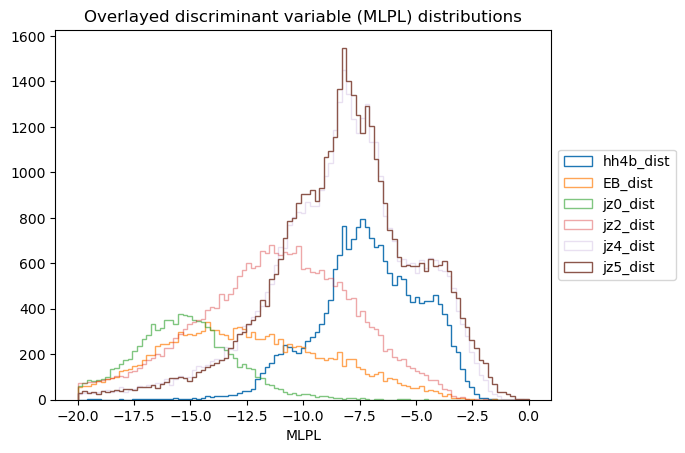

In [4]:
"""MLPL Overlayed Histograms"""
bins = np.linspace(-20, 0, 100)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist', histtype='step')
plt.hist(EB_dist, bins, alpha=0.7, label='EB_dist', histtype='step')
plt.hist(jz0_dist, bins, alpha=0.6, label='jz0_dist', histtype='step')
#plt.hist(jz1_dist, bins, alpha=0.5, label='jz1_dist', histtype='step')
plt.hist(jz2_dist, bins, alpha=0.4, label='jz2_dist', histtype='step')
#plt.hist(jz3_dist, bins, alpha=0.3, label='jz3_dist', histtype='step')
plt.hist(jz4_dist, bins, alpha=0.2, label='jz4_dist', histtype='step')
plt.hist(jz5_dist, bins, alpha=1, label='jz5_dist', histtype='step')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Overlayed discriminant variable (MLPL) distributions")
plt.xlabel("MLPL")
plt.show()

In [5]:
print ("Ideally, we want to lose 0% (as small percentage as we can) of the signal and keep 0% (as small percentage as we can) of the backrground\n")
print("---------------------------\n")
cuts = [-20,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6-5,-1]
for i in cuts:
    print("For a " + str(i) + " MLPL cut we: \n" 
          "lose " + str((np.array(hh4b_dist) < i).sum() / len(hh4b_dist) * 100) + "% of the hh->4b signal\n"
          "lose " + str((np.array(EB_dist) < i).sum() / len(EB_dist) * 100) + "% of the EB_data sample\n"
          "keep " + str((np.array(jz0_dist) > i).sum() / len(jz0_dist) * 100) + "% of the dijet (jz0) background\n"
          "keep " + str((np.array(jz1_dist) > i).sum() / len(jz1_dist) * 100) + "% of the dijet (jz1) background\n"
          "keep " + str((np.array(jz2_dist) > i).sum() / len(jz2_dist) * 100) + "% of the dijet (jz2) background\n"
          "keep " + str((np.array(jz3_dist) > i).sum() / len(jz3_dist) * 100) + "% of the dijet (jz3) background\n"
          "keep " + str((np.array(jz4_dist) > i).sum() / len(jz4_dist) * 100) + "% of the dijet (jz4) background\n"
          "keep " + str((np.array(jz5_dist) > i).sum() / len(jz5_dist) * 100) + "% of the dijet (jz5) background\n"
          "______________________________________________________________________________________________________\n"
         )

Ideally, we want to lose 0% (as small percentage as we can) of the signal and keep 0% (as small percentage as we can) of the backrground

---------------------------

For a -20 MLPL cut we: 
lose 0.07574227428802262% of the hh->4b signal
lose 16.794413217509792% of the EB_data sample
keep 82.89198606271778% of the dijet (jz0) background
keep 79.08958740662756% of the dijet (jz1) background
keep 85.4460685483871% of the dijet (jz2) background
keep 92.42443028244104% of the dijet (jz3) background
keep 94.63037300978756% of the dijet (jz4) background
keep 94.60024654398168% of the dijet (jz5) background
______________________________________________________________________________________________________

For a -15 MLPL cut we: 
lose 0.24742476267420724% of the hh->4b signal
lose 39.425424402430025% of the EB_data sample
keep 35.81881533101045% of the dijet (jz0) background
keep 48.55366721812804% of the dijet (jz1) background
keep 73.33984375% of the dijet (jz2) background
keep 87.298832

## Jet Multiplicities Histograms

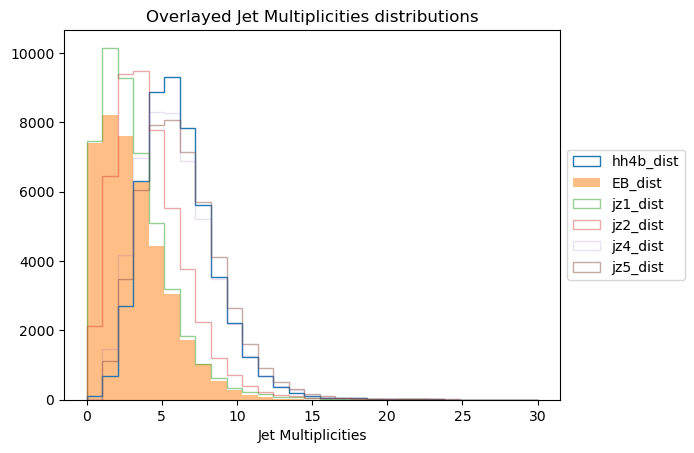

In [6]:
"""Jet Multiplicities Overlayed Histograms"""
bins = np.linspace(0, 30, 30)

plt.hist(hh4b_multiplicities, bins, alpha=1, label='hh4b_dist', histtype='step')
plt.hist(EB_multiplicities, bins, alpha=0.5, label='EB_dist', histtype='stepfilled')
#plt.hist(jz0_multiplicities, bins, alpha=1, label='jz0_dist', histtype='step')
plt.hist(jz1_multiplicities, bins, alpha=0.5, label='jz1_dist', histtype='step')
plt.hist(jz2_multiplicities, bins, alpha=0.4, label='jz2_dist', histtype='step')
#plt.hist(jz3_multiplicities, bins, alpha=0.3, label='jz3_dist', histtype='step')
plt.hist(jz4_multiplicities, bins, alpha=0.2, label='jz4_dist', histtype='step')
plt.hist(jz5_multiplicities, bins, alpha=0.5, label='jz5_dist', histtype='step')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Overlayed Jet Multiplicities distributions")
plt.xlabel("Jet Multiplicities")
plt.show()

## ROC Curve Implementations 

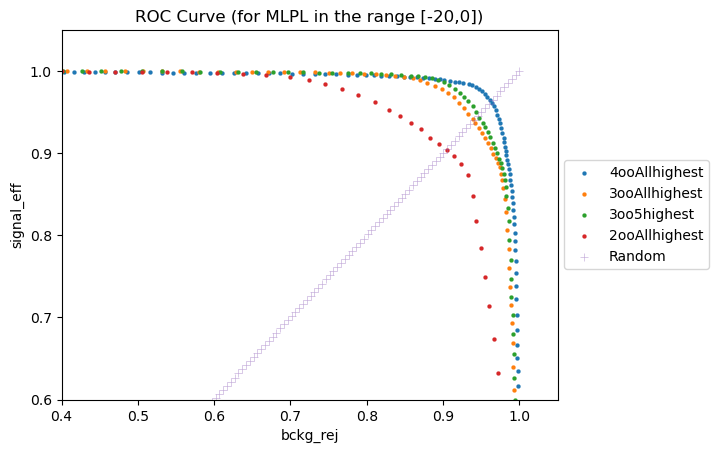

In [7]:
"""Implementation of the ROC Curve"""
cut_array = np.linspace(-20, 0, num=201)

sig_4ooAllhighest = joblib.load('./' + '1st_dist_outputs/' + '/hh4b_dist_nofake.sav')
bckg_4ooAllhighest = joblib.load('./' + '1st_dist_outputs' + '/jz0_dist.sav')
sig_3ooAllhighest = joblib.load('./' + '3ooAllhighest_dist' + '/hh4b_dist_nofake.sav')
bckg_3ooAllhighest = joblib.load('./' + '3ooAllhighest_dist' + '/jz0_dist.sav')
sig_3oo5highest = joblib.load('./' + '3oo5highest_dist' + '/hh4b_dist_nofake.sav')
bckg_3oo5highest = joblib.load('./' + '3oo5highest_dist' + '/jz0_dist.sav')
sig_2ooAllhighest = joblib.load('./' + '2ooAllhighest_dist' + '/hh4b_dist_nofake.sav')
bckg_2ooAllhighest = joblib.load('./' + '2ooAllhighest_dist' + '/jz0_dist.sav')

eff_4ooAllhighest = []
rej_4ooAllhighest = []
eff_3ooAllhighest = []
rej_3ooAllhighest = []
eff_3oo5highest = []
rej_3oo5highest = []
eff_2ooAllhighest = []
rej_2ooAllhighest = []

random_y = []
random_x = []
c = 0

for i in cut_array:
    c += 1/201
    random_y.append(c)
    random_x.append(c)
    eff_4ooAllhighest.append((np.array(sig_4ooAllhighest) > i).sum() / len(sig_4ooAllhighest))
    rej_4ooAllhighest.append((np.array(bckg_4ooAllhighest) < i).sum() / len(bckg_4ooAllhighest))
    eff_3ooAllhighest.append((np.array(sig_3ooAllhighest) > i).sum() / len(sig_3ooAllhighest))
    rej_3ooAllhighest.append((np.array(bckg_3ooAllhighest) < i).sum() / len(bckg_3ooAllhighest))
    eff_3oo5highest.append((np.array(sig_3oo5highest) > i).sum() / len(sig_3oo5highest))
    rej_3oo5highest.append((np.array(bckg_3oo5highest) < i).sum() / len(bckg_3oo5highest))
    eff_2ooAllhighest.append((np.array(sig_2ooAllhighest) > i).sum() / len(sig_2ooAllhighest))
    rej_2ooAllhighest.append((np.array(bckg_2ooAllhighest) < i).sum() / len(bckg_2ooAllhighest))

plt.scatter(rej_4ooAllhighest,eff_4ooAllhighest, alpha = 1, linewidths=0.1, marker = '.', label = '4ooAllhighest')
plt.scatter(rej_3ooAllhighest,eff_3ooAllhighest, alpha = 1, linewidths=0.1, marker = '.', label = '3ooAllhighest')
plt.scatter(rej_3oo5highest,eff_3oo5highest, alpha = 1, linewidths=0.1, marker = '.', label = '3oo5highest')
plt.scatter(rej_2ooAllhighest,eff_2ooAllhighest, alpha = 1, linewidths=0.1, marker = '.', label = '2ooAllhighest')
plt.scatter(random_y,random_x, alpha = 0.5, linewidths=0.5, marker = '+', label = 'Random')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("ROC Curve (for MLPL in the range [-20,0])")
plt.xlim([0.4,1.05])
plt.ylim([0.6,1.05])
plt.xlabel("bckg_rej")
plt.ylabel("signal_eff")
plt.show()

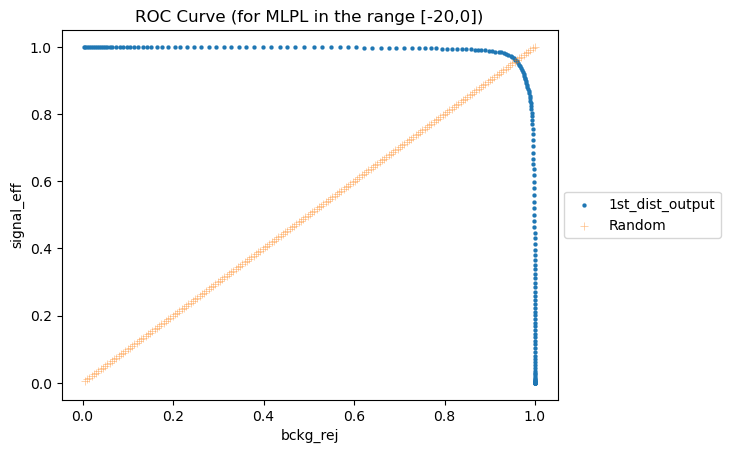

In [8]:
""" A parallel implementation of the ROC Curve """ 
cut_array = np.linspace(-20, 0, num=201)

signal = np.histogram(hh4b_dist, cut_array)[0]
background = np.histogram(jz0_dist, cut_array)[0]

sigeff = ( signal.sum() - signal[:].cumsum() ) / signal.sum()
bckgrej = background[:].cumsum() / background.sum()

plt.scatter(bckgrej,sigeff, alpha = 1, linewidths=0.1, marker = '.', label = '1st_dist_output')
plt.scatter(random_y,random_x, alpha = 0.5, linewidths=0.5, marker = '+', label = 'Random')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("ROC Curve (for MLPL in the range [-20,0])")
#plt.xlim([0.4,1.05])
#plt.ylim([0.6,1.05])
plt.xlabel("bckg_rej")
plt.ylabel("signal_eff")
plt.show()

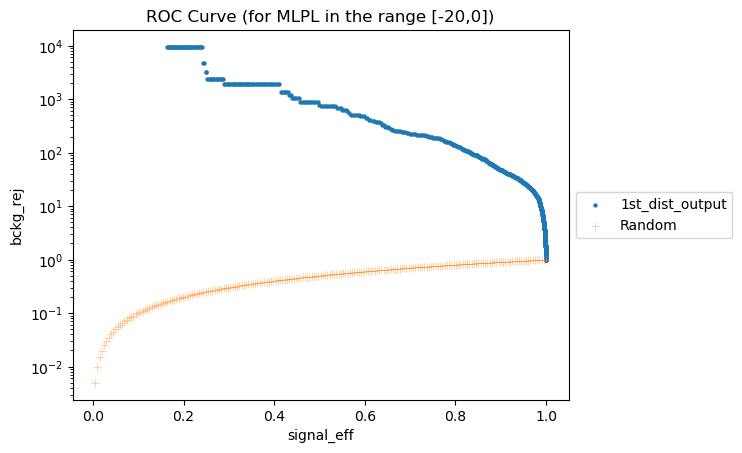

In [16]:
""" A standard implementation of the ROC Curve """ 
cut_array = np.linspace(-20, 0, num=1001)

signal = np.histogram(hh4b_dist, cut_array)[0]
background = np.histogram(jz0_dist, cut_array)[0]

sigeff = ( signal.sum() - signal[:].cumsum() ) / signal.sum()
#bckgrej = background[:].cumsum() / background.sum()
bckgeff = ( background.sum() - background[:].cumsum() ) / background.sum()
valid = (bckgeff > 0) & (sigeff > 0)
rej = 1/bckgeff[valid]
eff = sigeff[valid]


plt.scatter(eff,rej, alpha = 1, linewidths=0.1, marker = '.', label = '1st_dist_output')
plt.scatter(random_y,random_x, alpha = 0.5, linewidths=0.5, marker = '+', label = 'Random')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("ROC Curve (for MLPL in the range [-20,0])")
#plt.xlim([0.4,1.05])
#plt.ylim([0.6,1.05])
plt.xlabel("signal_eff")
plt.ylabel("bckg_rej")
plt.show()

## Implementing the weighted sum of the JZ slices

In [29]:
""" Doing the weighted sum of the JZ slices"""
bin_no = 100
minimum = -20
maximum = 0 

weights_jz0 = np.full_like(jz0_dist,0.7651165653000001)
weights_jz1 = np.full_like(jz1_dist,0.0032993956809600007)
weights_jz2 = np.full_like(jz2_dist,2.6009622717000003e-05)
weights_jz3 = np.full_like(jz3_dist,3.3590422200000005e-07)
weights_jz4 = np.full_like(jz4_dist,3.8673973868e-09)
weights_jz5 = np.full_like(jz5_dist,7.7799492096e-11)

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist

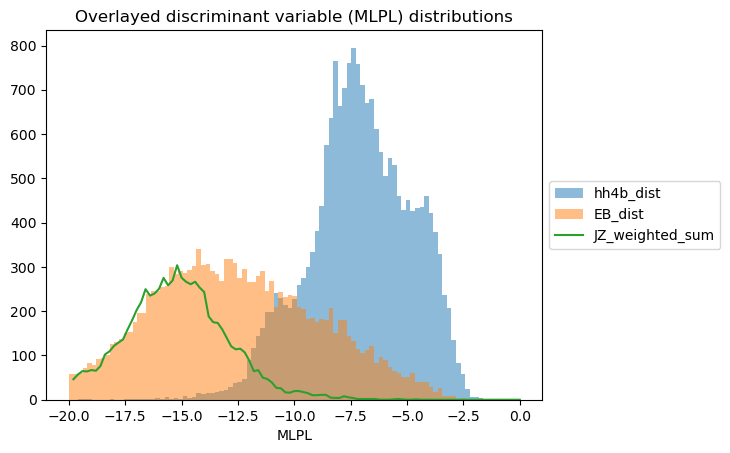

In [31]:
"""MLPL Overlayed Histograms"""
bins = np.linspace(-20, 0, 100)

plt.hist(hh4b_dist, bins, alpha=0.5, label='hh4b_dist', histtype='stepfilled')
plt.hist(EB_dist, bins, alpha=0.5, label='EB_dist', histtype='stepfilled')
plt.plot(jz0_bin_edges[1:],jz_weighted_sum_hist, alpha=1, label='JZ_weighted_sum')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Overlayed discriminant variable (MLPL) distributions")
plt.xlabel("MLPL")
plt.show()

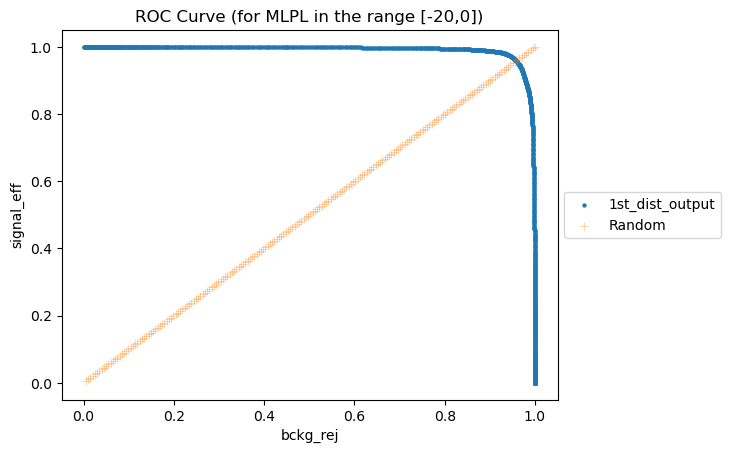

In [24]:
""" ROC Curve Implementation with the background being the weighted sum of the JZ slices """ 
cut_array = np.linspace(-20, 0, num=1001)

signal = np.histogram(hh4b_dist, cut_array)[0]
background = jz_weighted_sum_hist

sigeff = ( signal.sum() - signal[:].cumsum() ) / signal.sum()
bckgrej = background[:].cumsum() / background.sum()

plt.scatter(bckgrej,sigeff, alpha = 1, linewidths=0.1, marker = '.', label = '1st_dist_output')
plt.scatter(random_y,random_x, alpha = 0.5, linewidths=0.5, marker = '+', label = 'Random')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("ROC Curve (for MLPL in the range [-20,0])")
#plt.xlim([0.4,1.05])
#plt.ylim([0.6,1.05])
plt.xlabel("bckg_rej")
plt.ylabel("signal_eff")
plt.show()

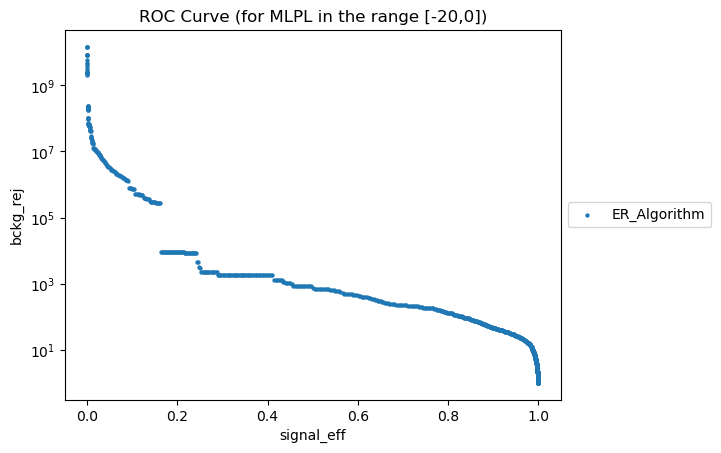

In [26]:
""" A standard implementation of the ROC Curve """ 
cut_array = np.linspace(-20, 0, num=1001)

signal = np.histogram(hh4b_dist, cut_array)[0]
background = jz_weighted_sum_hist

sigeff = ( signal.sum() - signal[:].cumsum() ) / signal.sum()
#bckgrej = background[:].cumsum() / background.sum()
bckgeff = ( background.sum() - background[:].cumsum() ) / background.sum()
valid = (bckgeff > 0) & (sigeff > 0)
rej = 1/bckgeff[valid]
eff = sigeff[valid]


plt.scatter(eff,rej, alpha = 1, linewidths=0.1, marker = '.', label = 'ER_Algorithm')
#plt.scatter(random_y,random_x, alpha = 0.5, linewidths=0.5, marker = '+', label = 'Random')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("ROC Curve (for MLPL in the range [-20,0])")
#plt.xlim([0.4,1.05])
#plt.ylim([0.6,1.05])
plt.xlabel("signal_eff")
plt.ylabel("bckg_rej")
plt.show()